In [11]:
import sys 
import dlib
import cv2
import os

import matplotlib.pyplot as plt

In [12]:
SRC_PATH = "/Users/samuilstoychev/ckplus_cross_subject/"
DEST_PATH = "/Users/samuilstoychev/ckplus_cross_subject_cropped" 

In [13]:
detector = dlib.get_frontal_face_detector()

In [14]:
def listdir(path):
    """List all items in a given directory (in ascending order)."""
    res = []
    for f in os.listdir(path):
        if not f.startswith('.'):
            res.append(f)
    return sorted(res)

In [48]:
for split in ["train", "test"]: 
    for class_id in ["class_" + str(x) for x in range(8)]: 
        path = "/".join([SRC_PATH, split, class_id])
        dest = "/".join([DEST_PATH, split, class_id])
        image_names = listdir(path)
        for image_name in image_names: 
            img = dlib.load_rgb_image(path + "/" + image_name)
            dets = detector(img, 1)
            t, b, l, r = [dets[0].top(), dets[0].bottom(), dets[0].left(), dets[0].right()]
            
            l1 = int(l - (r-l)*0.1)
            b1 = int(b - (t-b)*0.1)
            r1 = int(r + (r-l)*0.1)
            t1 = int(t + (t-b)*0.1)
            
            crop = img[t1:b1, l1:r1]
            # https://stackoverflow.com/questions/42406338/why-cv2-imwrite-changes-the-color-of-pics
            cv2.imwrite(dest + "/" + image_name, cv2.cvtColor(crop, cv2.COLOR_RGB2BGR))

In [20]:
img = dlib.load_rgb_image("/Users/samuilstoychev/ckplus_cross_subject/test/class_1/S010_004_00000017_f.png")

In [21]:
dets = detector(img, 1)

In [22]:
dets

rectangles[[(230, 142) (498, 409)]]

In [23]:
print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        i, d.left(), d.top(), d.right(), d.bottom()))

Number of faces detected: 1
Detection 0: Left: 230 Top: 142 Right: 498 Bottom: 409


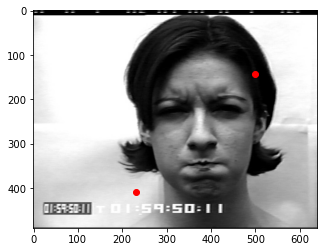

In [24]:
plt.imshow(img)
plt.scatter([dets[0].left(), dets[0].right()], [dets[0].bottom(), dets[0].top()], color="red")

In [42]:
l, b, r, t = [dets[0].left(), dets[0].bottom(), dets[0].right(), dets[0].top()]

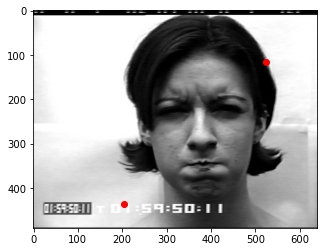

In [45]:
l1 = int(l - (r-l)*0.1)
b1 = int(b - (t-b)*0.1)
r1 = int(r + (r-l)*0.1)
t1 = int(t + (t-b)*0.1)

plt.imshow(img)
plt.scatter([l1, r1], [b1, t1], color="red")

In [46]:
crop = img[t1:b1, l1:r1]

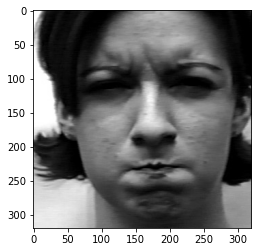

In [47]:
plt.imshow(crop)

In [39]:
crop = img[dets[0].top():dets[0].bottom(), dets[0].left():dets[0].right()]

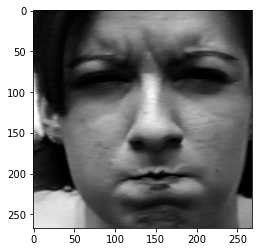

In [40]:
plt.imshow(crop)

In [30]:
cv2.imwrite("/Users/samuilstoychev/Desktop/cropped.jpg", cv2.cvtColor(crop, cv2.COLOR_RGB2BGR))

True